# HW1

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Q1
diamonds dataset exploration

### 1. How many rows are in "diamonds" dataset? How many columns?

#### Code

In [4]:
numrow <- nrow(diamonds) 
numcol <- ncol(diamonds) 
writeLines(paste("row number :", numrow), sep = "\n")
writeLines(paste("col number :", numcol),sep = "\n")

row number : 53940
col number : 10


#### Ans:
- row number : 53940
- col number : 10

### 2. Please find out what attributes contains in the "diamonds" dataset.

#### Code

In [6]:
attributes <- colnames(diamonds)
for (attr in attributes){
    writeLines(attr, sep = "\n")
}

carat
cut
color
clarity
depth
table
price
x
y
z


#### Ans:
carat,
cut,
color,
clarity,
depth,
table,
price,
x,
y,
z

### 3.Please find out the high-quality diamonds via filter by
- color(D) 
- cut(Ideal)
- clarity(IF).

#### Code 

In [7]:
high_q  <- filter(
    diamonds, color == 'D' & cut == "Ideal" & clarity == "IF"
)
head(high_q)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.51,Ideal,D,IF,62.0,56,3446,5.14,5.18,3.20
0.51,Ideal,D,IF,62.1,55,3446,5.12,5.13,3.19
0.53,Ideal,D,IF,61.5,54,3517,5.27,5.21,3.22
0.53,Ideal,D,IF,62.2,55,3812,5.17,5.19,3.22
0.63,Ideal,D,IF,61.2,53,3832,5.55,5.60,3.41
0.59,Ideal,D,IF,60.7,58,4161,5.45,5.49,3.32


In [18]:
dim(high_q)

[1] 28 10

In [9]:
write_csv(high_q, file=file.path("subdf", "high_quality.csv"))

#### Ans:
As above code

### 4.Following the previous question, which diamond is most expensive? Sort the data to find the answer.


#### Code

In [175]:
price_order <- high_q[order(-high_q$price),]
View(price_order[1,])
highest_price = price_order[1,"price"] %>% as.integer()
message(
    paste(
        "highest price in high qualiy group :\n",
        highest_price,sep=""
    )
)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.03,Ideal,D,IF,62,56,17590,6.55,6.44,4.03


highest price in high qualiy group :
17590



In [173]:
global_price_order <- diamonds[order(-diamonds$price),]
View(global_price_order[1,])
highest_price_global = global_price_order [1,"price"] %>% as.integer()
message(
    paste(
        "global highest price in high qualiy group :\n",
        highest_price_global,sep=""
    )
)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.29,Premium,I,VS2,60.8,60,18823,8.5,8.47,5.16


global highest price in high qualiy group :
18823



#### Ans:

For the high quality group, the highest price of them is 17590.

However, for all diamonds in the dataset, the highest price 
is 18823.

I think the reason that the diamond which has the highest price isn't in the high quality group is the __carat__.

For the diamonds that has price 18823 are heavier(2.29 carats) than 
the most expensive diamonds in high quality group(1.03 carats).



### 5. Please group the diamond by color, cut, and clarity. Calculate the mean price and mean carat for each group.

#### Code

##### For each one

In [159]:
color_g <- diamonds %>% group_by(color) 
mean_p_c <- color_g %>% summarise(mean_price=mean(price), mean_carat=mean(carat))
View(mean_p_c)
write_csv(mean_p_c, file.path("subdf","diamonds", "color_group_mean_price_carat.csv"))

color,mean_price,mean_carat
<ord>,<dbl>,<dbl>
D,3169.954,0.6577948
E,3076.752,0.6578667
F,3724.886,0.7365385
G,3999.136,0.7711902
H,4486.669,0.9117991
I,5091.875,1.0269273
J,5323.818,1.1621368


In [160]:
cut_g <- diamonds %>% group_by(cut) 
mean_p_c <- cut_g %>% summarise(mean_price=mean(price), mean_carat=mean(carat))
View(mean_p_c)
write_csv(mean_p_c, file.path("subdf","diamonds", "cut_group_mean_price_carat.csv"))

cut,mean_price,mean_carat
<ord>,<dbl>,<dbl>
Fair,4358.758,1.0461366
Good,3928.864,0.8491847
Very Good,3981.760,0.8063814
Premium,4584.258,0.8919549
Ideal,3457.542,0.7028370


In [161]:
clarity_g <- diamonds %>% group_by(clarity) 
mean_p_c <- clarity_g %>% summarise(mean_price=mean(price), mean_carat=mean(carat))
View(mean_p_c)
write_csv(mean_p_c, file.path("subdf","diamonds", "clarity_group_mean_price_carat.csv"))

clarity,mean_price,mean_carat
<ord>,<dbl>,<dbl>
I1,3924.169,1.2838462
SI2,5063.029,1.0776485
SI1,3996.001,0.8504822
VS2,3924.989,0.7639346
VS1,3839.455,0.7271582
VVS2,3283.737,0.5962021
VVS1,2523.115,0.5033215
IF,2864.839,0.5051229


##### Three Factors togather

In [169]:
allfactor_g <- diamonds %>% group_by(color,cut,clarity)
mean_price_carat <- allfactor_g %>% summarise(
    mean_price=mean(price),
    mean_carat = mean(carat)
)
write_csv(mean_price_carat, file.path("subdf","diamonds", "all_quality_factors.csv"))

`summarise()` has grouped output by 'color', 'cut'. You can override using the
`.groups` argument.


#### Ans:
As above code

### 6. Following the previous question, explore the relationship between the carat and price for each quality of diamonds and plot by scatter plots.

#### Code

##### Overall carat and price

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


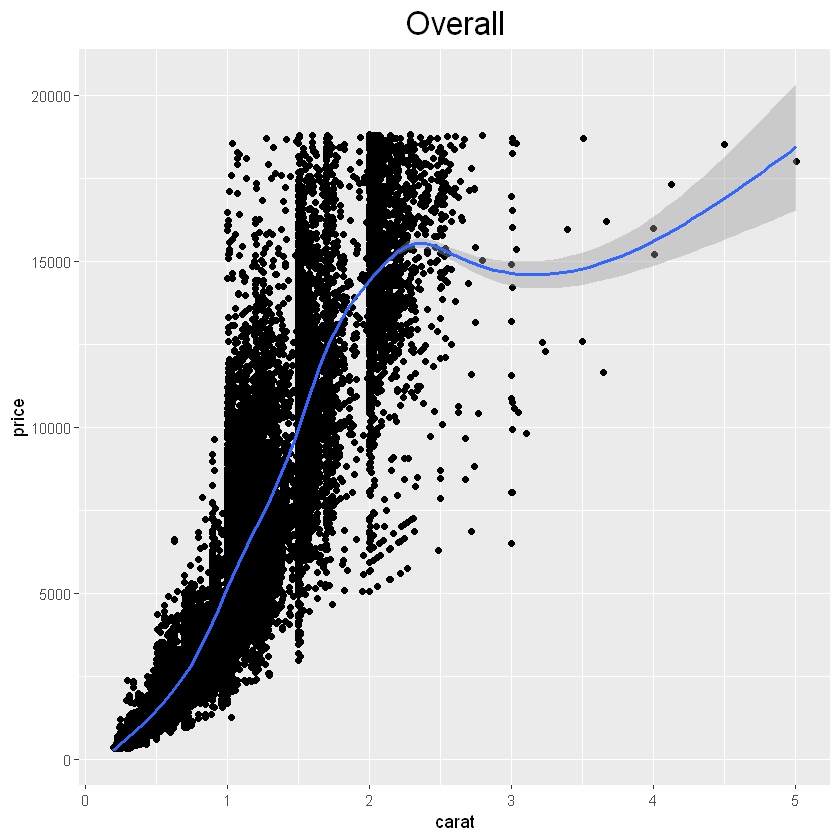

In [7]:
ggplot(
    diamonds, aes(x=carat, y=price)
) + geom_point() + geom_smooth() +labs(
    title="Overall"
) + theme(
    plot.title=element_text(hjust = 0.5,size=20)
)

ggsave(file.path("plot", "Overall_carat_price_scatter.jpg"))

##### Color aspect

Saving 6.67 x 6.67 in image


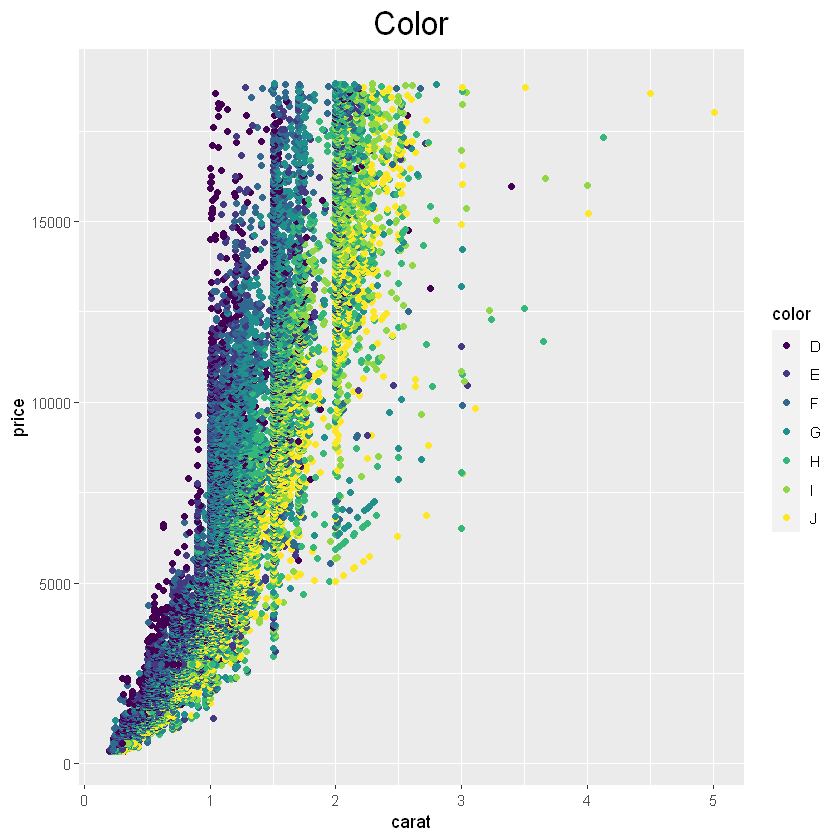

In [13]:
ggplot(
    diamonds, aes(x = carat,y = price, color=color)
) + geom_point() + labs(
    title="Color"
) + theme(
    plot.title=element_text(hjust = 0.5,size=20)
)

ggsave(file.path("plot","diamonds", "Color_carat_price_scatter.jpg"))

##### Cut aspect

Saving 6.67 x 6.67 in image


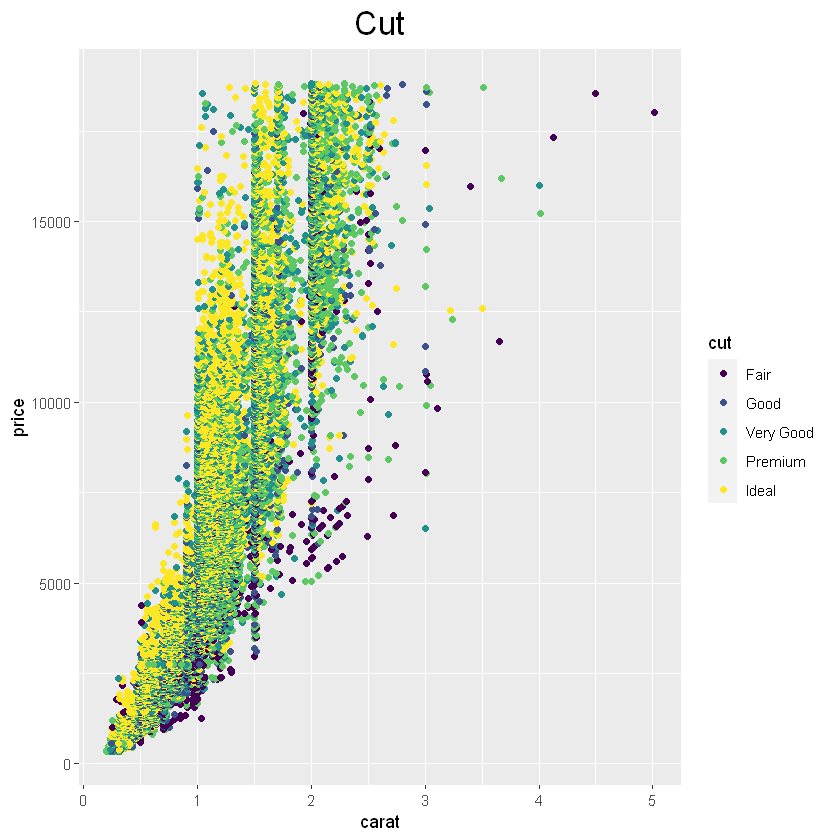

In [15]:
ggplot(
    diamonds, aes(x = carat,y = price, color=cut)
) + geom_point() + labs(
    title="Cut"
) + theme(
    plot.title=element_text(hjust = 0.5,size=20)
)

ggsave(file.path("plot","diamonds","Cut_carat_price_scatter.jpg"))

##### Clarity aspect

Saving 6.67 x 6.67 in image


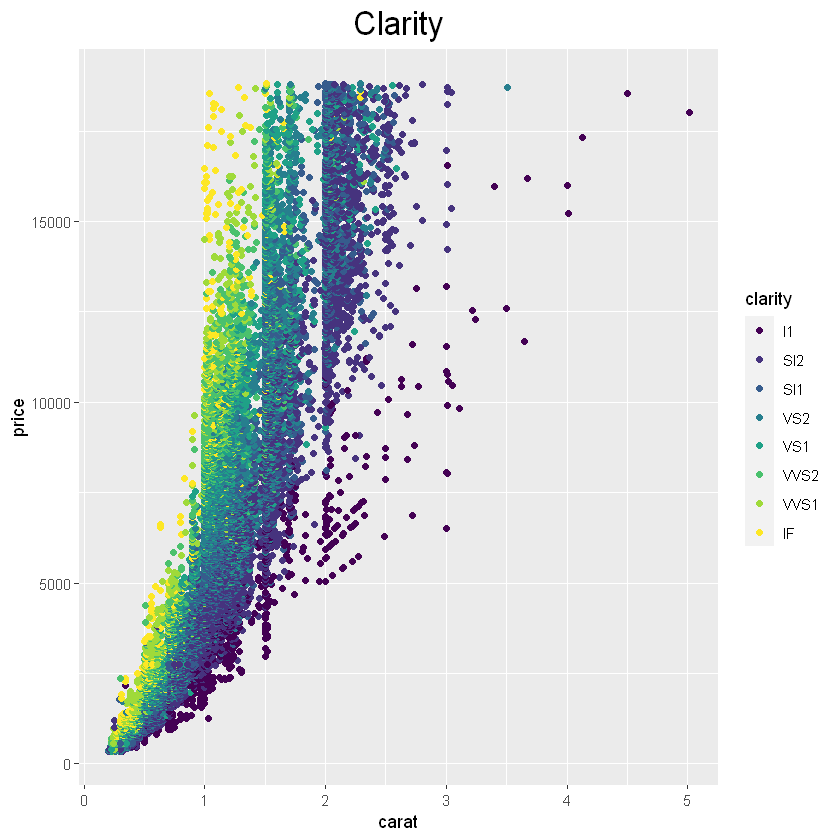

In [16]:
ggplot(
    diamonds, aes(x = carat,y = price, color=clarity)
) + geom_point() + labs(
    title="Clarity"
) + theme(
    plot.title=element_text(hjust = 0.5,size=20)
)

ggsave(file.path("plot","diamonds", "Clarity_carat_price_scatter.jpg"))

#### Ans:

Overall, the __heavier__ a dimond, the __more expensive__ it is.

- Color aspect:

    From the scatter plot ```Color```, when their carat are the same, different colors are in different price range.
    
    I think it is because there is a order between different colors of the diamond. 

    - The order of the color according to the plot ```Color``` (worst -> best):

        $J \to  I \to H \to G \to F \to E \to D$

- So as about clarity, cut

    - The order of the cut according to the plot ```Cut``` (worst -> best):
    
        $\text{Fair} \to \text{Good} \to \text{Very Good} \to \text{Premium}\to \text{Ideal}$

    - The order of the clarity according to plot ```Clarity``` (worst -> best):

        $\text{I1}\to \text{SI1}\to \text{SI2}\to \text{VS2}\to \text{VS1} \to \text{VVS2} \to \text{VVS1} \to \text{IF}$



## Q2

midwest dataset exploration

### 1. How many counties in Illinois?

#### Code

In [63]:
Illinois  <- filter(midwest, state == 'IL')
dim(Illinois)

[1] 102  28

In [48]:
# Just check if it has duplicated county
unique_county_num <- nrow(
    Illinois[!duplicated(Illinois[,c('county')]),]
)
message(unique_county_num)

102



#### Ans:
There are 102 unique counties in IL.

### 2. How many counties' populations are more than 10000 and less than 20000 in Illinois?

#### Code

In [49]:
target_population_row <- Illinois$poptotal > 10000 & Illinois$poptotal < 20000
target_region <- Illinois[target_population_row,]
nrow(target_region)

[1] 31

In [50]:
write_csv(target_region, file.path("subdf","midwest", "IL_pop10000_20000.csv"))

#### Ans:
There are 31 counties in IL that the total population are between 10000 to 20000

### 3. Which county is the least population in Illinois? How much population is it? Sort the data to find the answer.


#### Code

In [64]:
pop_order <-Illinois[order(Illinois$poptotal),]
needed_view <- c(
    'PID','county','state','area','poptotal','popdensity'
)
View(pop_order[1,needed_view ])

PID,county,state,area,poptotal,popdensity
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>
636,POPE,IL,0.022,4373,198.7727


#### Ans:
POPE has the least pop number: 4373

### 4. Please find out the relationship between area, total population, and population density. Try to figure out how to calculate population density on this dataset.

#### Code

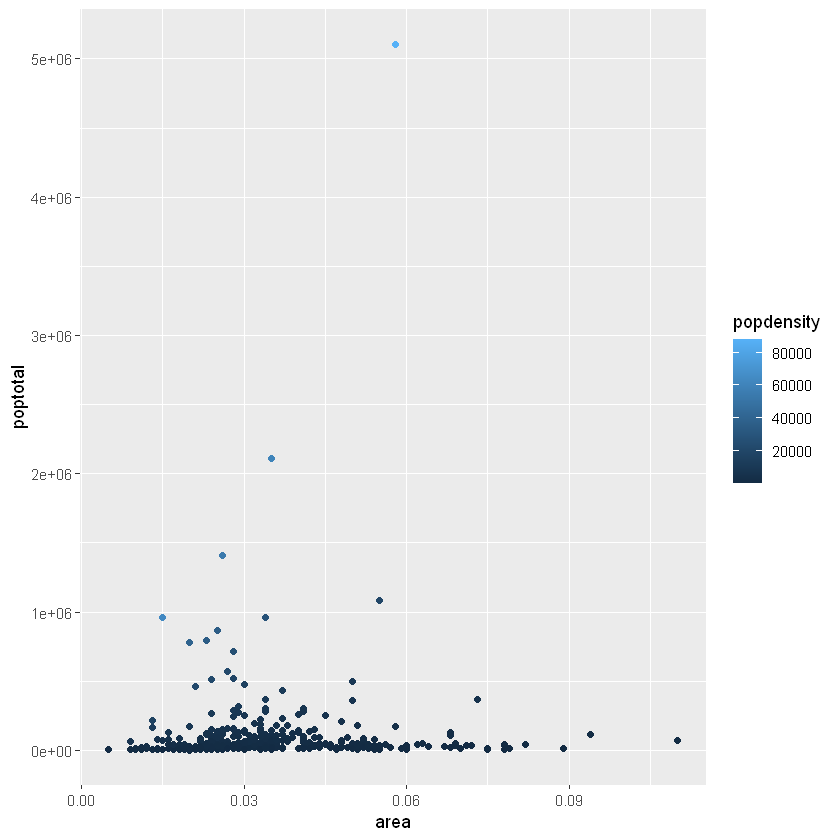

In [73]:
ggplot(
    midwest, aes(x = area, y = poptotal,color = popdensity)
)+geom_point()

In [74]:
d <- midwest$poptotal / midwest$area
plottting_df <- data.frame(midwest$area,midwest$poptotal,d)
message(colnames(plottting_df))

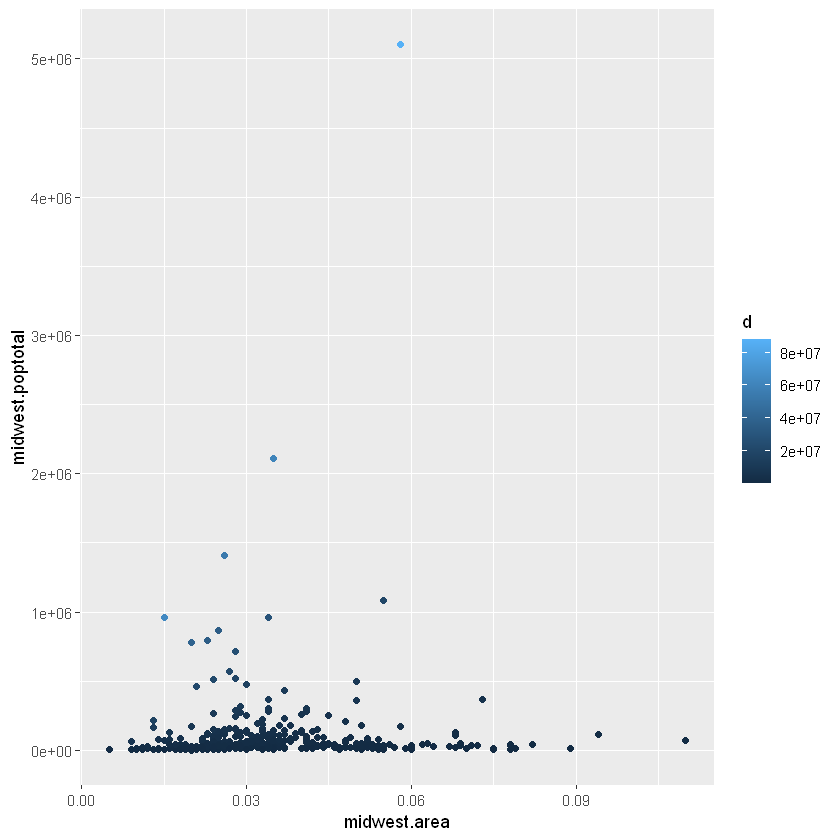

In [80]:
ggplot(
    plottting_df, aes(x = midwest.area, y=midwest.poptotal, color= d)
)+geom_point()

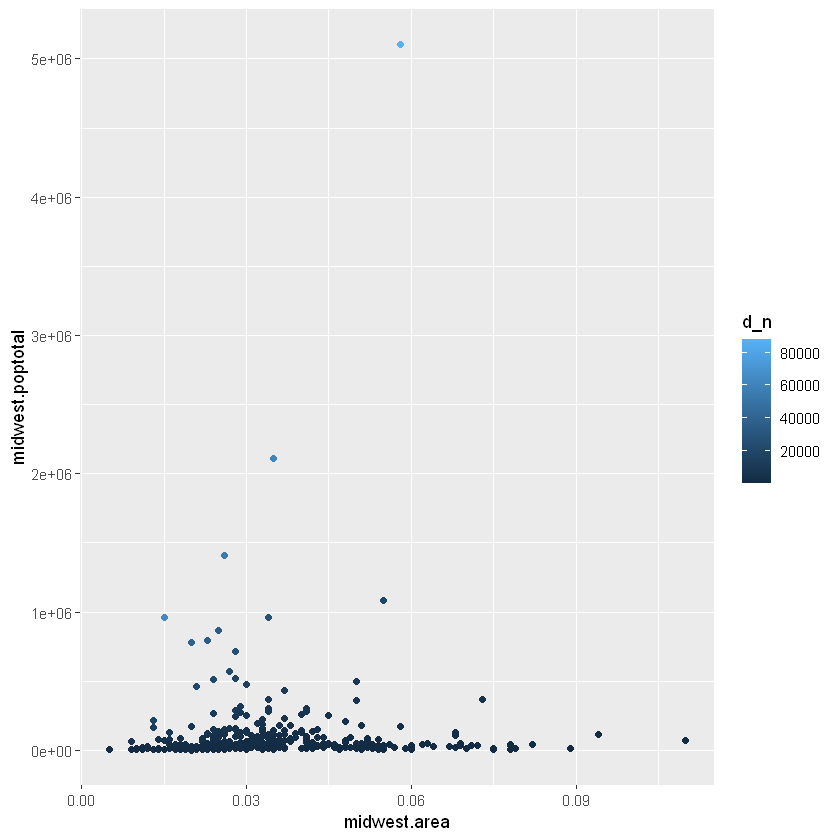

In [83]:
# Normalization about area unit:
d_n <- midwest$poptotal / (midwest$area*1000)

plottting_df <- data.frame(midwest$area,midwest$poptotal,d_n)
ggplot(
    plottting_df, aes(x = midwest.area, y=midwest.poptotal, color= d_n)
)+geom_point()

### Ans:

I divide the ```poptotal``` by ```area```, and the value of them are $10^3$ times to the value of ```popdensity```.
(By the label of the scatter plot)

Hence, I normalize the value of area by multiple $10^3$ to them and calculate density again.

In conclusion,I think the formula of population density of this dataset is:
$\text{popdensity} = \frac{\text{poptotal}}{\text{area}*10^3}$

### 5. Following the previous question, What is the population density of Illinois?

#### Code

In [84]:
IL_total_pop <- sum(Illinois[c('poptotal')])
IL_total_area <- sum(Illinois[c('area')])
IL_d = IL_total_pop / (IL_total_area*1000)
message(paste("total population :",IL_total_pop,sep=""))
message(paste("total area :",IL_total_area,sep=""))
message(paste("popdensity :",IL_d ,sep=""))

total population :11430602

total area :3.304

popdensity :3459.62530266344



#### Ans:
about 3459.63

### 6. What is the population density of each state? Plot the bar plot to show it.

#### Code

In [2]:
all_state <- midwest[!duplicated(midwest[,c('state')]), ]$state


In [20]:
d_list = c()
for (st in all_state){
    st_df <- filter(midwest, state == st)
    d <- sum(st_df[c('poptotal')]) / (sum(st_df[c('area')])*1000)
    d_list<-append(d_list, d, after = length(d_list))
}

In [21]:
st_density_df <- data.frame("ST"=all_state,"d"=d_list)
st_density_df

ST,d
<chr>,<dbl>
IL,3459.625
IN,2606.563
MI,2768.930
OH,4480.428
WI,1488.670


In [22]:
write_csv(st_density_df,file.path("subdf", "midwest", "state_d.csv") )

Saving 6.67 x 6.67 in image


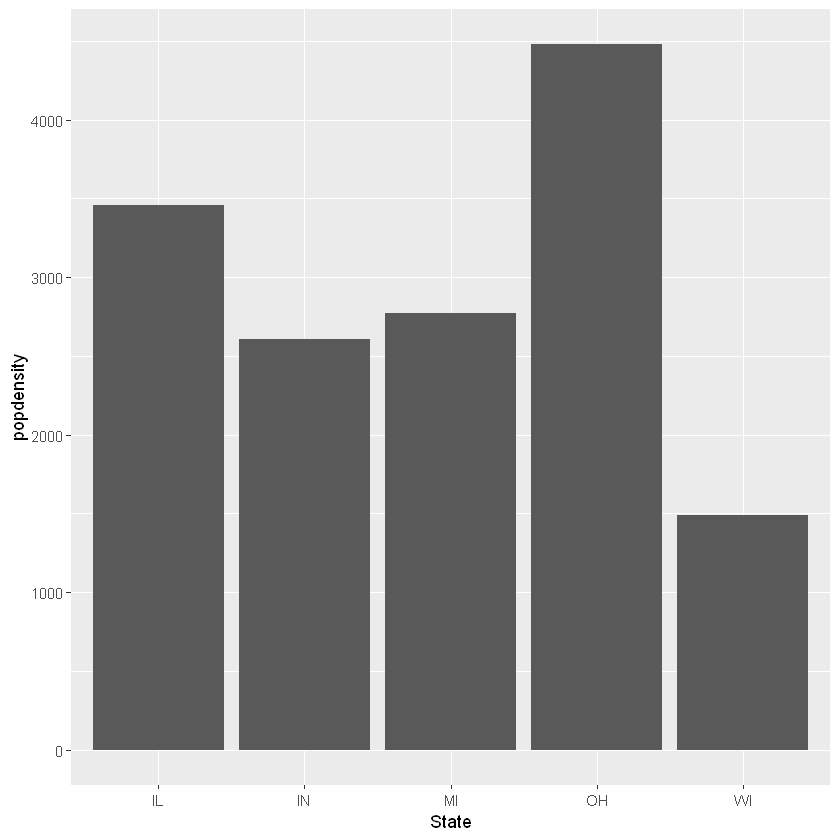

In [27]:
ggplot(
    st_density_df, aes(x=ST, y=d)
) + geom_bar(
    stat="identity"
) + labs(
    x = "State",y = "popdensity"
)

ggsave(file.path("plot","midwest", "st_popdensity.jpg"))

## Q3

sleep dataset exploration

### 1. How many rows are in "sleep" dataset? How many columns?

#### Code

In [32]:
dims <- dim(sleep)
row <- dims[1]
col <- dims[2]
message(paste("row num : ", row))
message(paste("col num : ", col))

row num :  20

col num :  3



#### Ans:

20 rows and 3 columns

### 2. Please find out what attributes contains in the "sleep" dataset and explain it.

#### Code

In [35]:
for (at in colnames(sleep)){
    message(at)
}
    

extra

group

ID



#### Ans:
It has 3 attributions:
- ```extra``` : increase in hours of sleep
- ```group``` : drug given
- ```ID``` : patient ID

**reference**: https://r-data.pmagunia.com/dataset/r-dataset-package-datasets-sleep

### 3. Please group the two soporific drugs and calculate the mean of increase in hours of sleep and median of increase in hours of sleep for each soporific drug

#### Code

In [40]:
drug_g <- sleep %>% group_by(group) 
mean_sleeptimeex <- drug_g %>% summarise(mean_extra=mean(extra))
View(mean_sleeptimeex)
median_sleeptimeex <- drug_g %>% summarise(median_extra=median(extra))
View(median_sleeptimeex)

group,mean_extra
<fct>,<dbl>
1,0.75
2,2.33


group,median_extra
<fct>,<dbl>
1,0.35
2,1.75


#### Ans:

increase in hours of sleep:

||soporific drugs 1|soporific drugs 2|
|-|-|-|
|mean| 0.75| 2.33|
|meadian| 0.35 | 1.75|



### 4. Using any data visualization skill to present Which soporific drug can increase more sleep time? Please submit the figure and your code

#### Code

Saving 6.67 x 6.67 in image


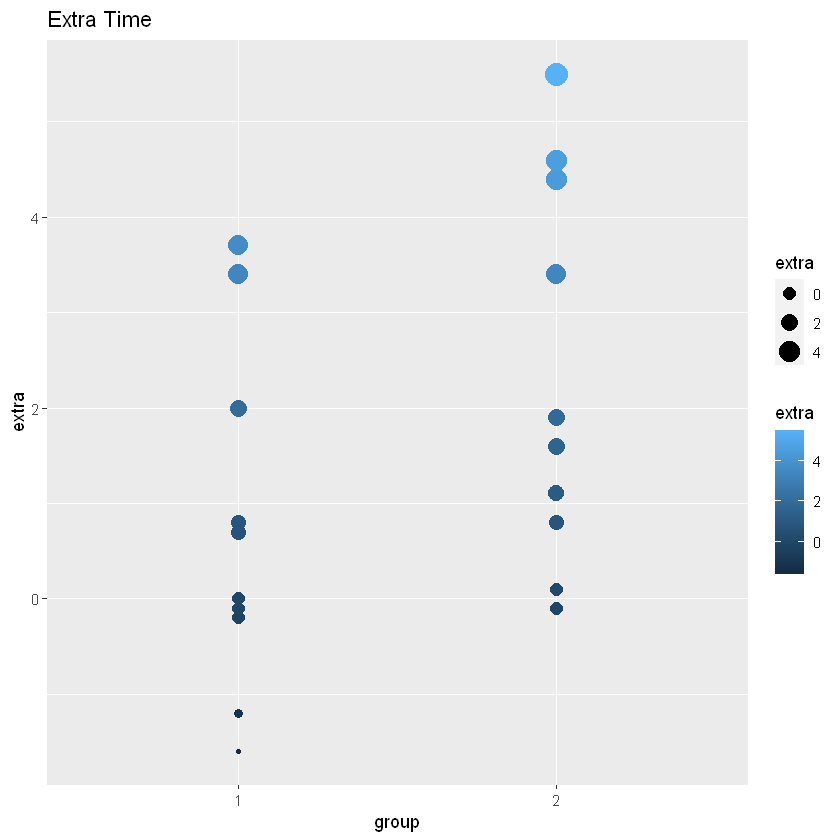

In [11]:
ggplot(
    data = sleep
) + geom_point(
    mapping = aes(x = group, y = extra,size=extra, color=extra)
) + labs(title= "Extra Time")

ggsave(file.path("plot", "sleep", "Extra_Time.jpg"))

## Q4

quakes dataset exploration

### 1. Please inspect data to find out what attributes contains in the "quakes" dataset and explain it.

#### Code

In [13]:
for (at in colnames(quakes)){
    message(at)
}

lat

long

depth

mag

stations



In [14]:
# Get helpfile
file <- help(quakes)
pkgname <- basename(dirname(dirname(file)))
temp <- tools::Rd2HTML(utils:::.getHelpFile(file), out = tempfile("Rtxt"), 
                  package = pkgname)
file.copy(temp,".\\helpfile\\quakes.html")

[1] TRUE

#### Ans:
Attributes:

- lat : Latitude of event
- long : Longitude of event
- depth : Depth (km)
- mag : Richter Magnitude
- stations : Number of stations reporting

### 2. How many observations magnitude > 5.0 and depth > 500 in this dataset?

#### Code

In [16]:
targetevent <- quakes[quakes$mag > 5.0 & quakes$depth > 500 ,]
dim(targetevent)

[1] 38  5

In [24]:
num_of_stations <-targetevent[
    !duplicated( targetevent[,c('stations')] ) ,
]

Nstations <- dim(targetevent)[1]
message(paste("# stations : ", Nstations))

# stations :  38



#### Ans:
38

### 3.Following the previous question(magnitude > 5.0 and depth > 500), please plot the scatter plot by longitude(long) and latitude(lat) and color by the magnitude.

#### Code

Saving 6.67 x 6.67 in image


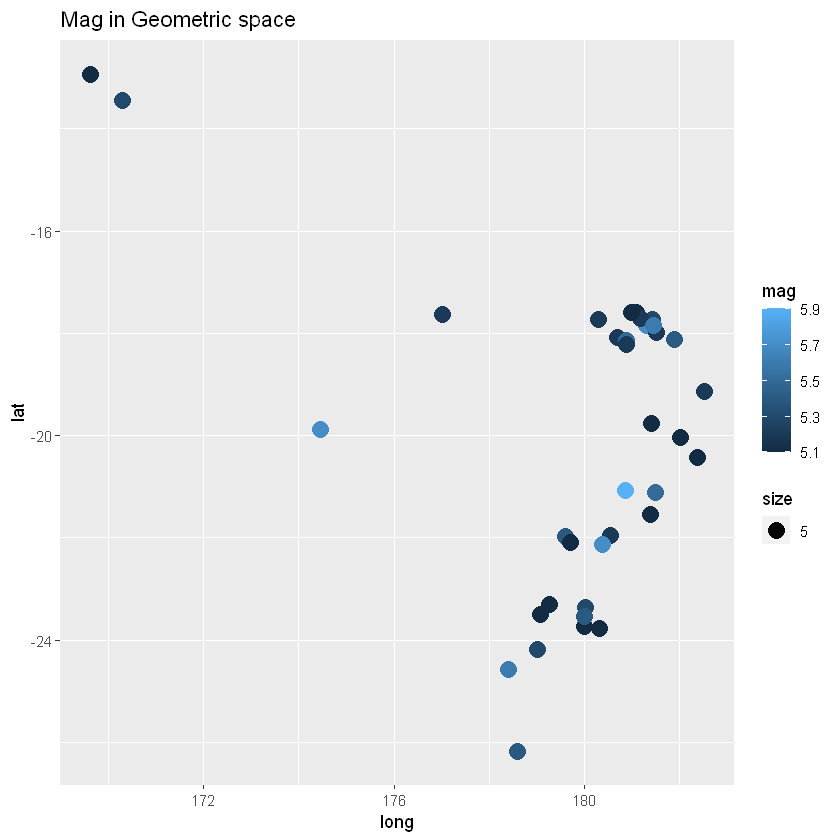

In [29]:
ggplot(
    targetevent, aes(x=long, y=lat, color=mag, size=5)
)+ geom_point()+labs(title="Mag in Geometric space")

ggsave(file.path("plot","quake","Mag_Geo.jpg"))

### 4. Please plot the box plot by magnitude to find out how many outliers in the figure? Tips: x = factor(0)

#### Code

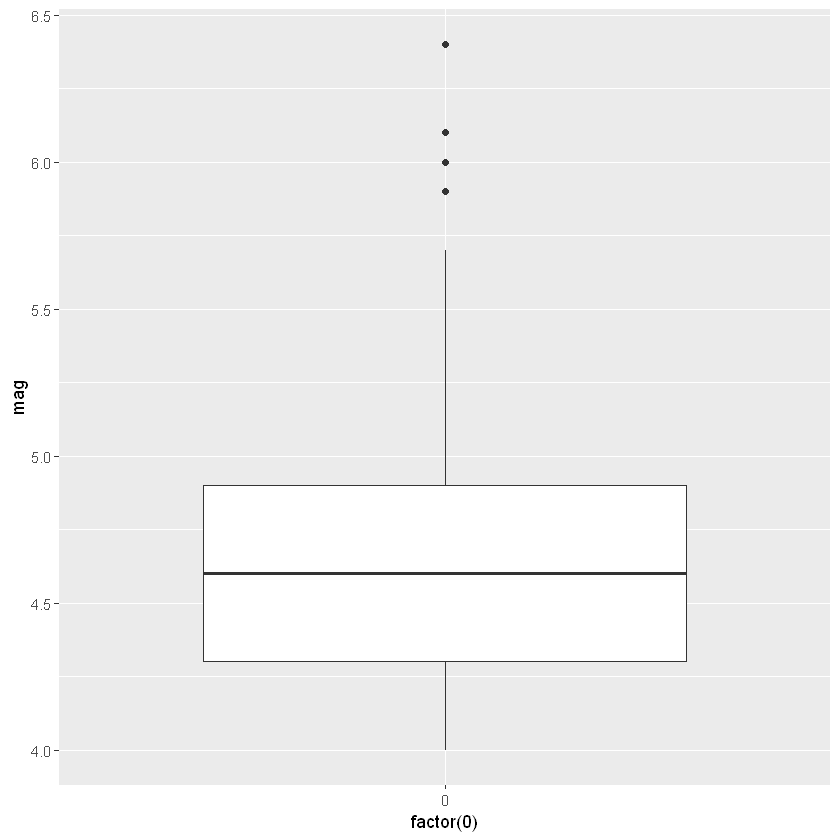

In [61]:
ggplot(
    quakes, aes(x=factor(0), y = mag)
) +geom_boxplot()


#### Ans:
According to the ox plot,
number of outliners = 4. 

### 5. Please plot the histogram by magnitude frequency to find out the distribution. Tips: Please note the width of the bin when you plot.

#### Code

Saving 6.67 x 6.67 in image


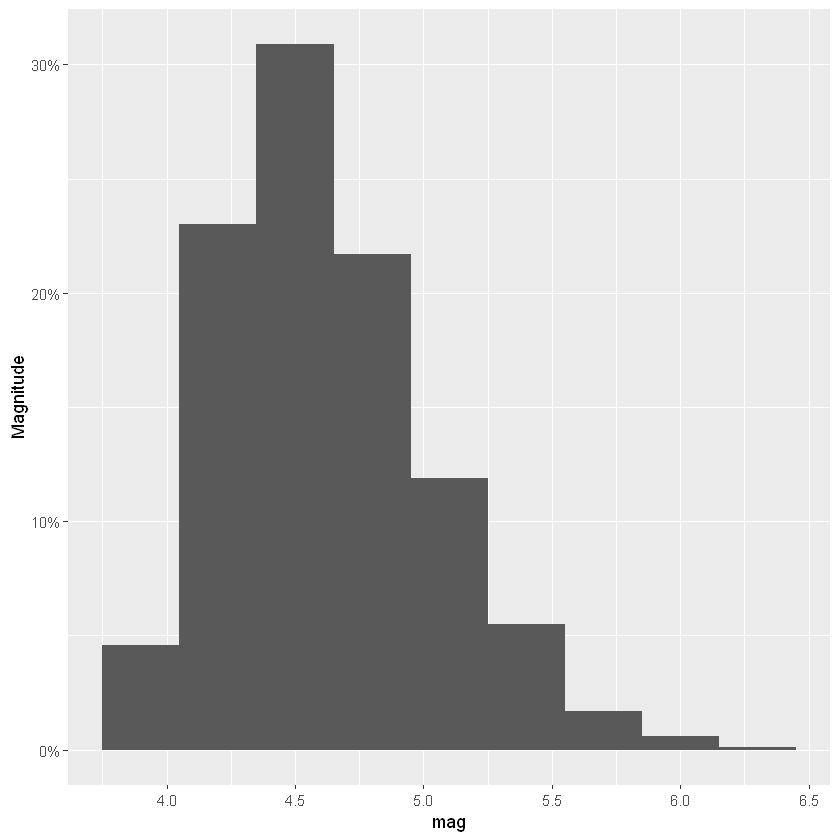

In [58]:
ggplot(
    quakes, aes(x=mag)
)+geom_histogram(
    aes(y = after_stat(count / sum(count))),
    binwidth = 0.3
)+labs(y="Magnitude"
)+scale_y_continuous(labels = scales::percent)
ggsave(file.path("plot", "quake", "mag_freq.jpg"))

### 6. Please plot the histogram by depth frequency to find out the distribution. Tips: Please note the width of the bin when you plot

#### Code

Saving 6.67 x 6.67 in image


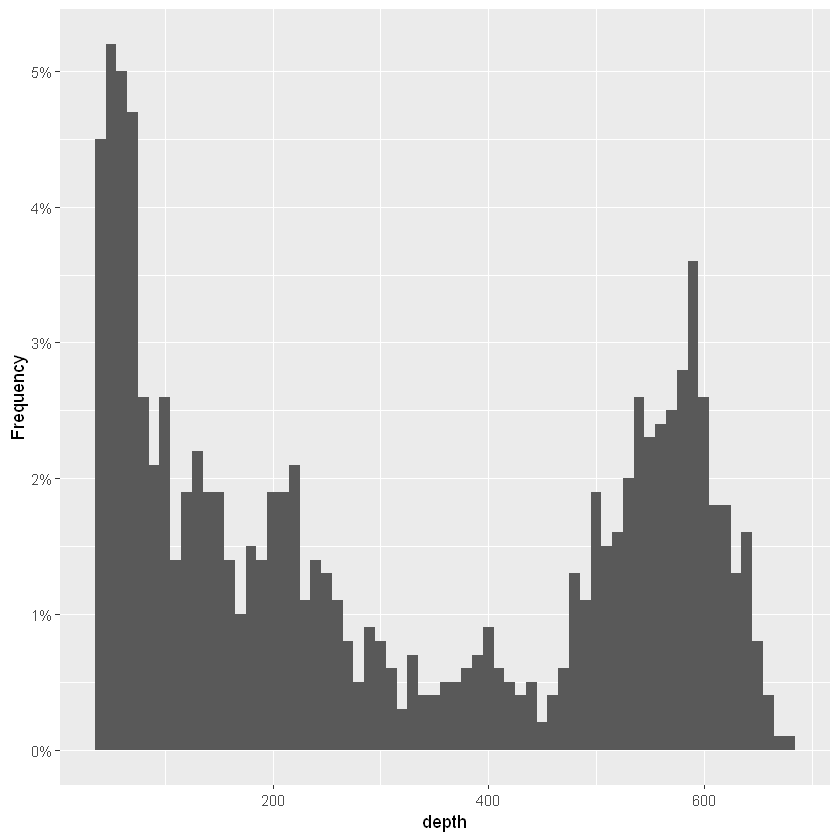

In [50]:
ggplot(
    quakes, aes(x=depth)
)+geom_histogram(
    aes(y = after_stat(count / sum(count))),
    binwidth = 10
)+labs(y="Frequency"
)+scale_y_continuous(labels = scales::percent)
ggsave(file.path("plot", "quake", "depth_freq.jpg"))